In [441]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [442]:
df = pd.read_csv('E:/Data/german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [443]:
df.shape

(1000, 10)

In [444]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [445]:
# Уберу колонку 'Unnamed: 0'

In [446]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [447]:
df.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV


In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [449]:
# Дубликаты

In [450]:
df.duplicated().value_counts()

False    1000
dtype: int64

In [451]:
# Дубликатов нет

In [452]:
# Пропущенные значения

In [453]:
df.isnull().sum() 

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

## EDA

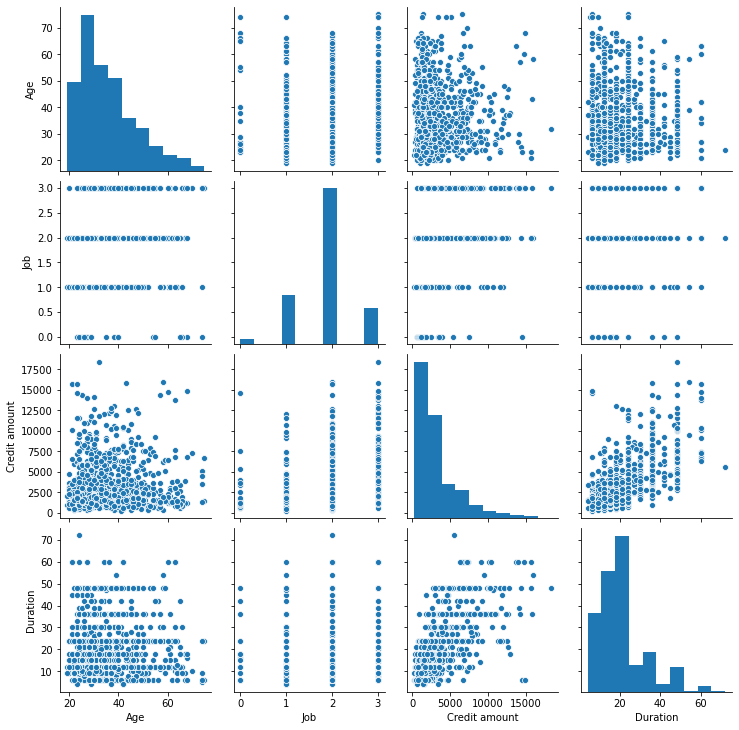

In [454]:
sns.pairplot(df)

In [455]:
# Имеем 3 числовых признака.Рассмотрим их

## Age

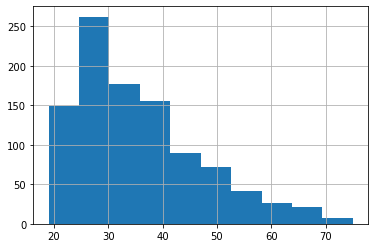

In [456]:
df['Age'].hist()

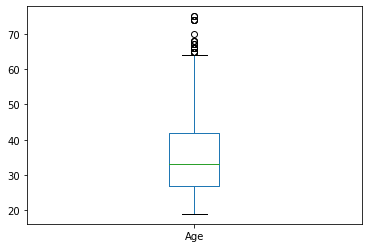

In [457]:
df['Age'].plot.box()
plt.show()

## Credit amount

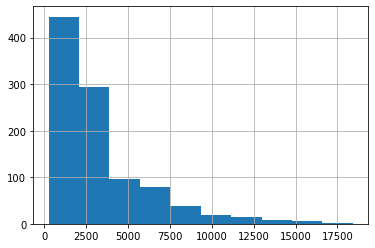

In [458]:
df['Credit amount'].hist()

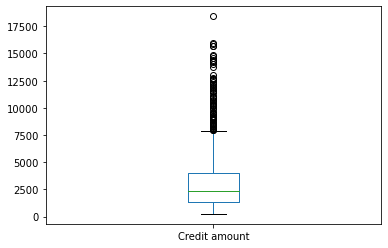

In [459]:
df['Credit amount'].plot.box()
plt.show()

## Duration

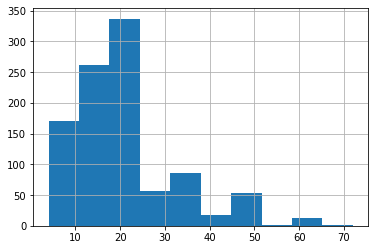

In [460]:
df['Duration'].hist()

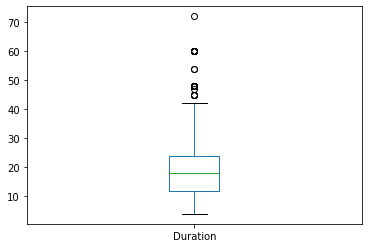

In [461]:
df['Duration'].plot.box()
plt.show()

## Sex

In [462]:
df['Sex'].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [463]:
df['Sex'].value_counts(normalize=True)

male      0.69
female    0.31
Name: Sex, dtype: float64

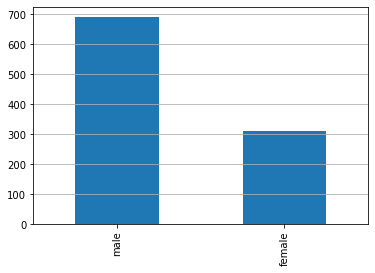

In [464]:
df['Sex'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')

## Job

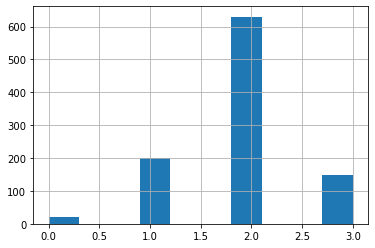

In [465]:
df['Job'].hist()

In [466]:
df['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

In [467]:
df['Job'].value_counts(normalize=True)

2    0.630
1    0.200
3    0.148
0    0.022
Name: Job, dtype: float64

## Housing

In [468]:
df['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [469]:
df['Housing'].value_counts(normalize=True)

own     0.713
rent    0.179
free    0.108
Name: Housing, dtype: float64

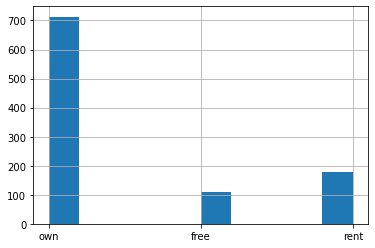

In [470]:
df['Housing'].hist()

## Saving accounts

In [471]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [472]:
df['Saving accounts'].value_counts(normalize=True)

little        0.738066
moderate      0.126071
quite rich    0.077111
rich          0.058752
Name: Saving accounts, dtype: float64

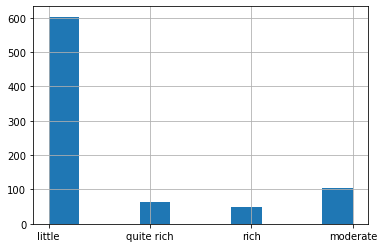

In [473]:
df['Saving accounts'].hist()

In [474]:
 df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode().values[0])

In [475]:
df['Saving accounts'].value_counts()

little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

## Checking account

In [476]:
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [477]:
df['Checking account'].value_counts(normalize=True)

little      0.452145
moderate    0.443894
rich        0.103960
Name: Checking account, dtype: float64

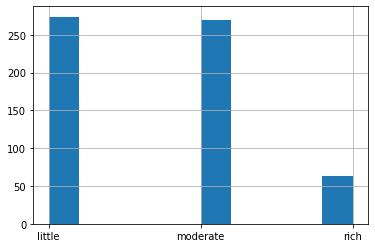

In [478]:
df['Checking account'].hist()

In [479]:
 df['Checking account'] = df['Checking account'].fillna(df['Checking account'].mode().values[0])

In [480]:
df['Checking account'].value_counts()

little      668
moderate    269
rich         63
Name: Checking account, dtype: int64

In [481]:
df.isnull().sum() 

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

## Purpose

In [482]:
df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

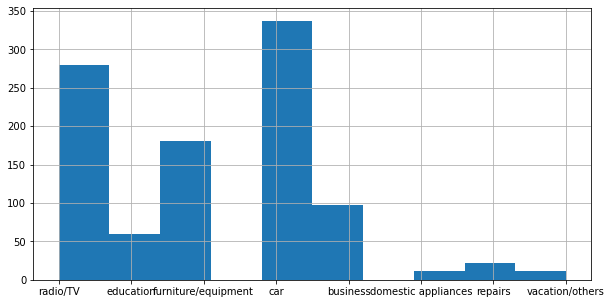

In [483]:
plt.figure(figsize=(10, 5))
df['Purpose'].hist()

## Статистика

In [484]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


## Делаем выводы:

## Рассчитаем корреляцию и построим heatmap

In [485]:
corr = df.corr()

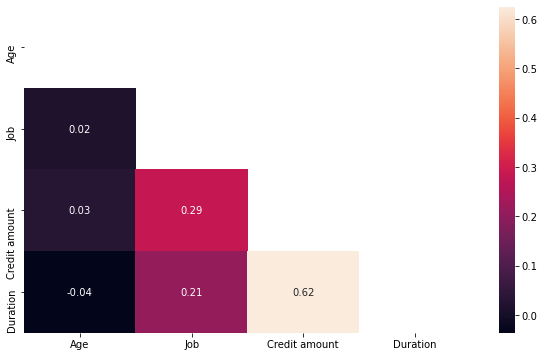

In [486]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,6));
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask);


# Нормализация данных

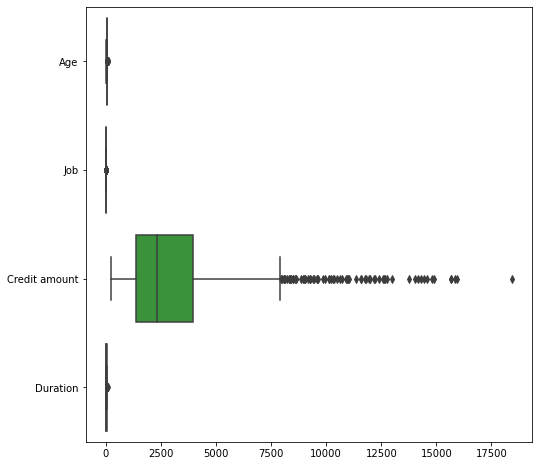

In [487]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, orient='h');

In [488]:
df1 = pd.get_dummies(df)
df1.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


### Алгоритм KMeans работает по метрике расстояния,поэтому необходимо шкалировать данные

### Шкалирую переменные MinMaxScaler'ом

In [489]:
from sklearn.preprocessing import MinMaxScaler

In [490]:
scaler = MinMaxScaler()

In [491]:
X_scaled = scaler.fit_transform(df1)

In [492]:
df_scaled = pd.DataFrame(X_scaled, columns=df1.columns)

In [493]:
df_scaled.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.857143,0.666667,0.050567,0.029412,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.053571,0.666667,0.313690,0.647059,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.535714,0.333333,0.101574,0.117647,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.464286,0.666667,0.419941,0.558824,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.607143,0.666667,0.254209,0.294118,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


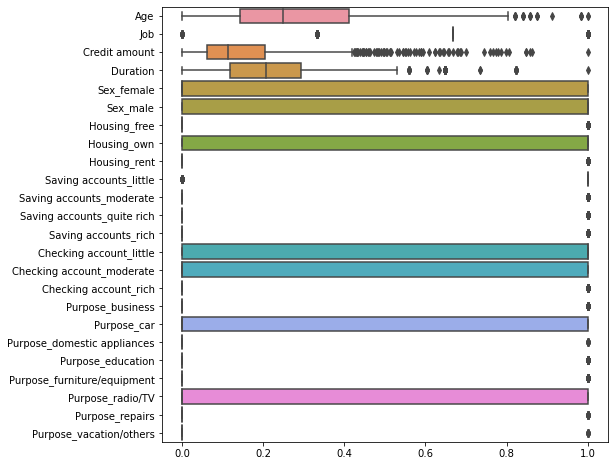

In [494]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df_scaled, orient='h');

# Снижение размерности. Попробую разные методы 

## tSNE

In [540]:
from sklearn.manifold import TSNE

In [541]:
tsne = TSNE(n_components=2, random_state=10)

In [542]:
X_tsne = tsne.fit_transform(X_scaled)

In [543]:
X_tsne.shape

(1000, 2)

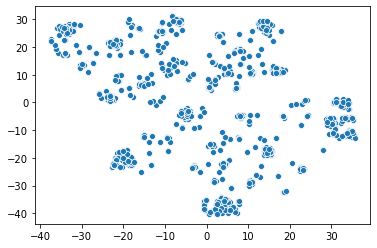

In [544]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1]);

## PCA

In [545]:
from sklearn.decomposition import PCA


In [546]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [547]:
X_pca.shape

(1000, 2)

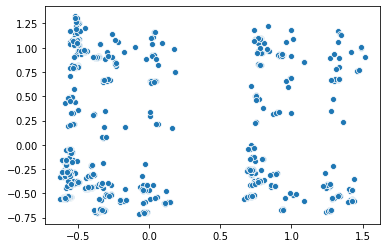

In [548]:
sns.scatterplot(X_pca[:,0], X_pca[:,1]);

## UMAP

In [549]:
import umap

In [550]:
X_um = umap.UMAP().fit_transform(X_scaled)

In [551]:
X_um.shape

(1000, 2)

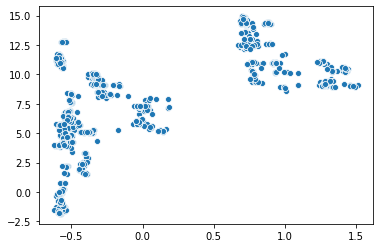

In [552]:
sns.scatterplot(X_pca[:,0], X_um[:,1]);

# K-means 

In [553]:
from sklearn.cluster import KMeans

In [509]:
## Подбираю оптимальное количество кластеров при помощи Elbow method

In [554]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10, n_jobs=-1).fit(X_scaled)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

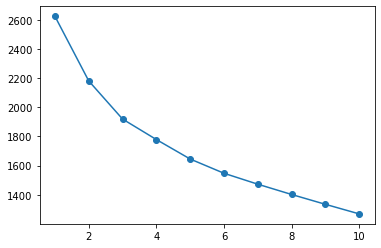

In [555]:
plt.plot(range(1,11), inertia, marker='o');

In [556]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

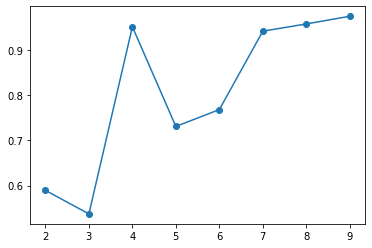

In [557]:
plt.plot(range(2,10), D, marker='o');

### Оптимальное кол.-во кластеров - 3

In [588]:
kmeans = KMeans(n_clusters=3, random_state=10).fit(X_scaled)
labels = kmeans.labels_

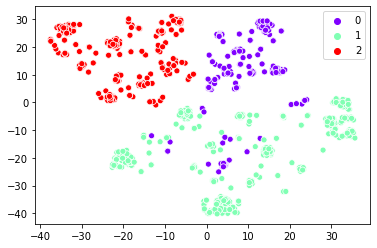

In [595]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels, palette='rainbow');

In [596]:
df1['labels'] = labels

In [597]:
df1.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,labels
0,67,2,1169,6,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
1,22,2,5951,48,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,2
2,49,1,2096,12,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
3,45,2,7882,42,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,53,2,4870,24,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [598]:
df1['labels'].value_counts(normalize=True).sort_index()

0    0.226
1    0.464
2    0.310
Name: labels, dtype: float64

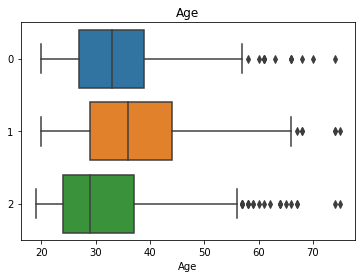

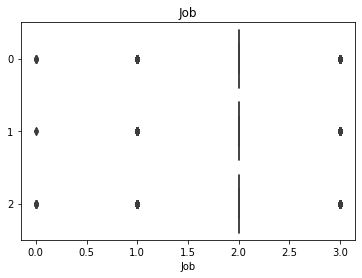

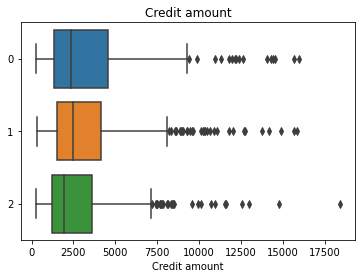

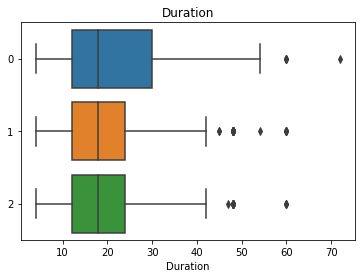

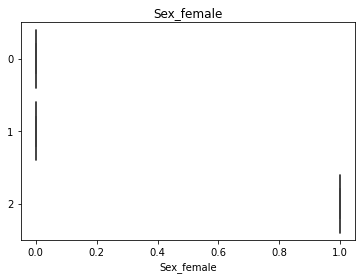

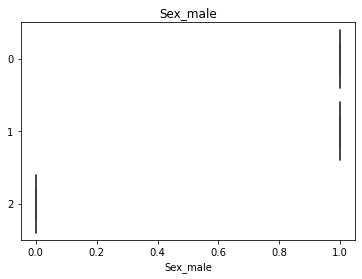

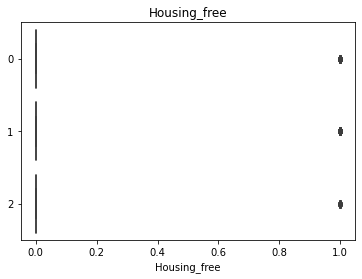

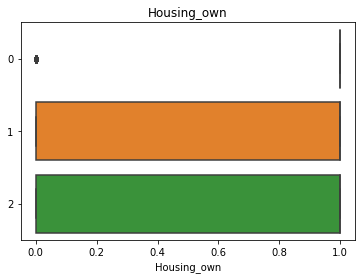

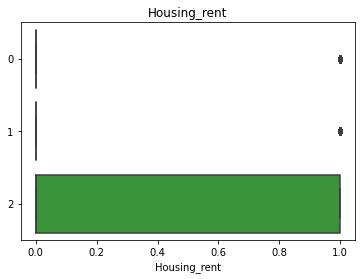

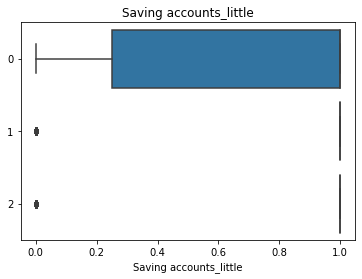

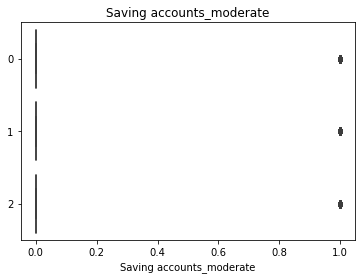

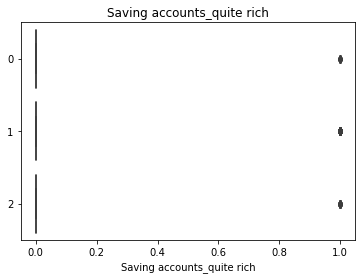

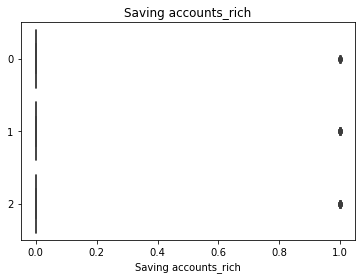

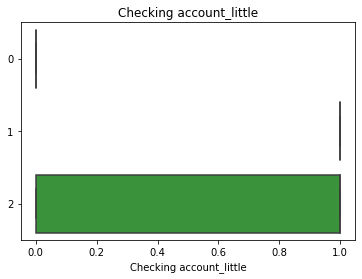

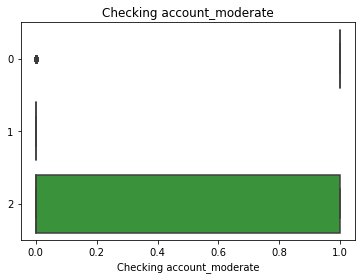

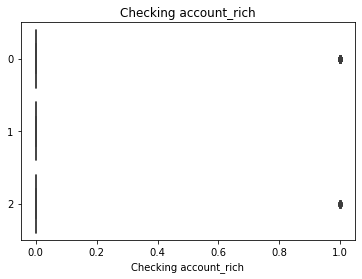

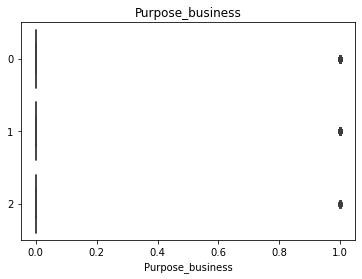

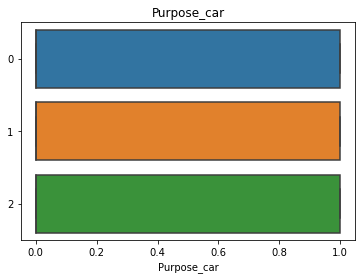

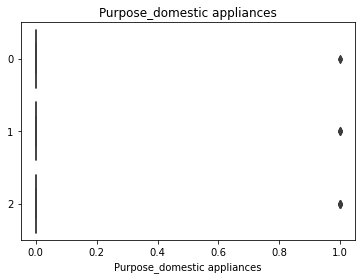

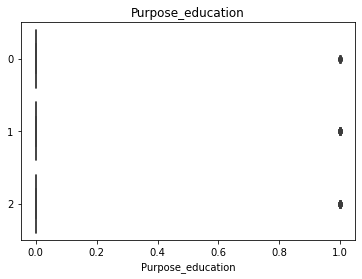

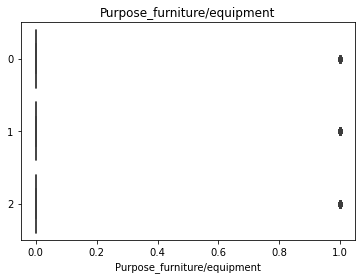

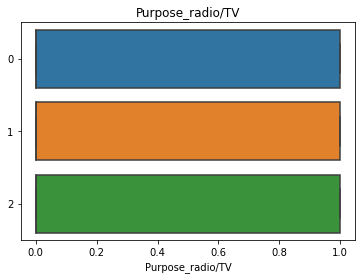

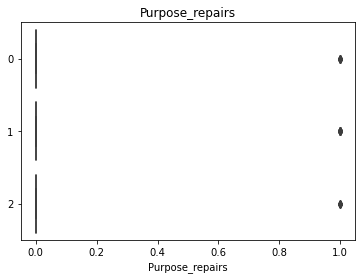

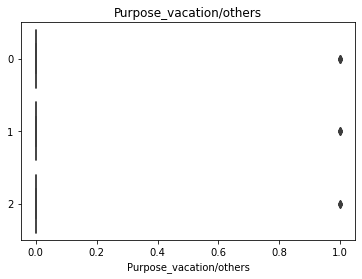

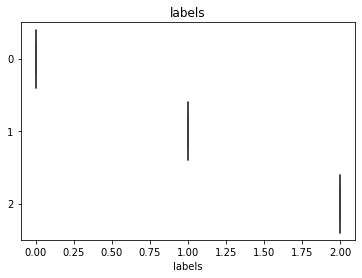

In [599]:
for col in df1.columns:
    sns.boxplot(data=df1, x=col, y=labels, orient='h')
    plt.title(col)
    plt.show();

In [600]:
df1.groupby('labels').median().T.round(2)

labels,0,1,2
Age,33,36,29
Job,2,2,2
Credit amount,2375,2468,1959
Duration,18,18,18
Sex_female,0,0,1
Sex_male,1,1,0
Housing_free,0,0,0
Housing_own,1,1,1
Housing_rent,0,0,0
Saving accounts_little,1,1,1


# AgglomerativeClustering

In [571]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from tqdm import tqdm

## Строим дендрограмму 

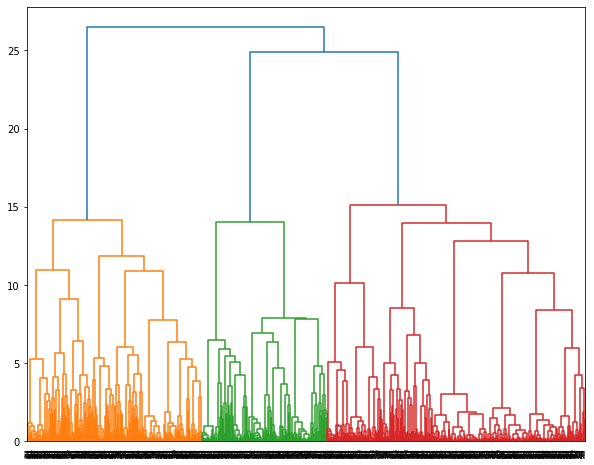

In [572]:
plt.figure(figsize=(10,8))
linkage_ = linkage(X_scaled, method='ward')
dendrogram_ = dendrogram(linkage_)

## Видно,что самое оптимальное - 3 кластера.Проверим на  Silhouette plot

In [573]:
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_scaled)
    labels = agg.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)

100%|████████████████████████████████████████████| 9/9 [00:00<00:00,  9.32it/s]


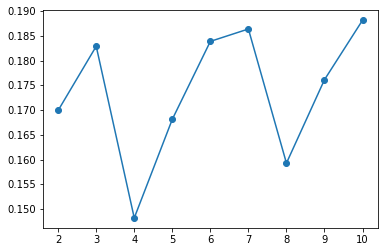

In [574]:
plt.plot(range(2,11), silhouette, marker='o');

In [575]:
agg = AgglomerativeClustering(n_clusters=3).fit(X_scaled)
labels = agg.labels_

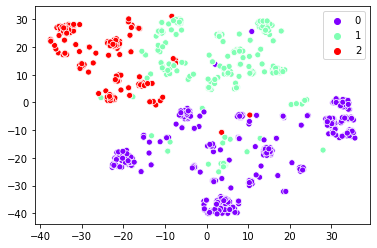

In [576]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels, palette='rainbow');

### Silhouette plot подтверждает,что оптимальнее взять 3 кластера

In [577]:
df1['labels'] = labels

In [578]:
df1['labels'].value_counts(normalize=True)

0    0.462
1    0.314
2    0.224
Name: labels, dtype: float64

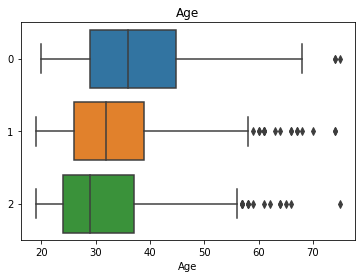

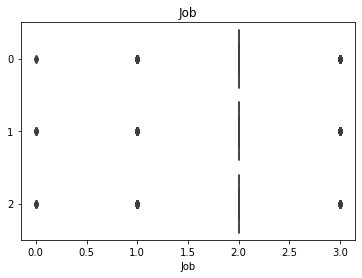

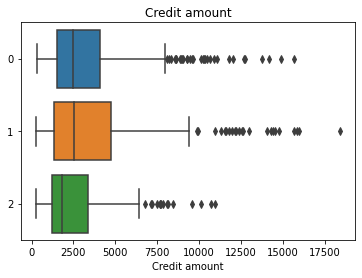

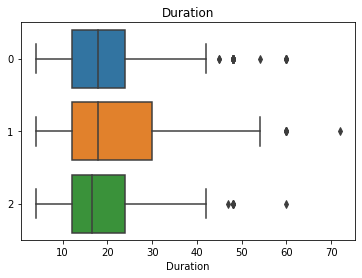

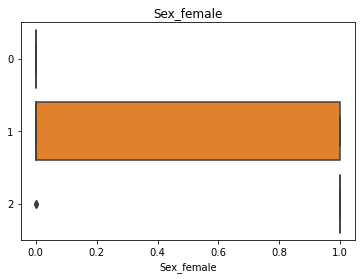

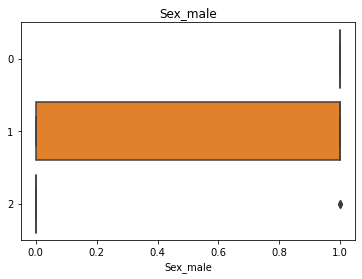

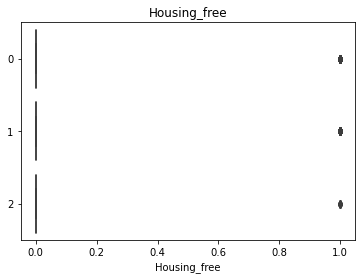

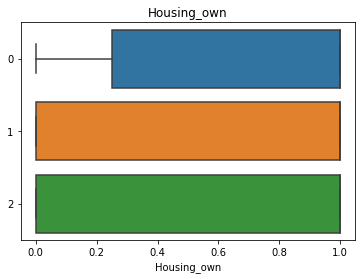

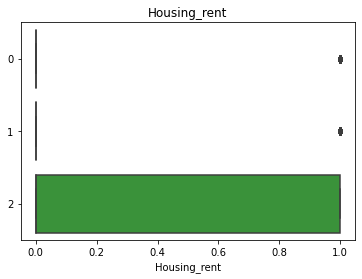

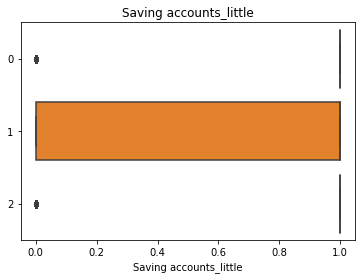

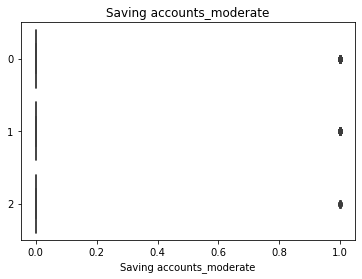

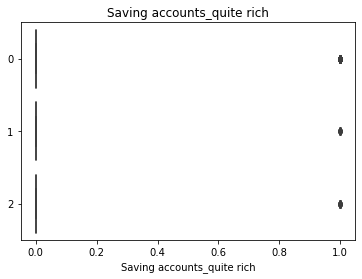

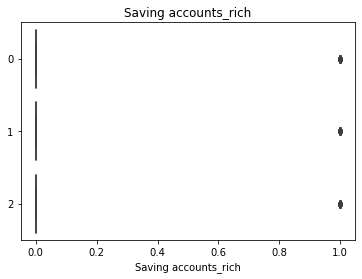

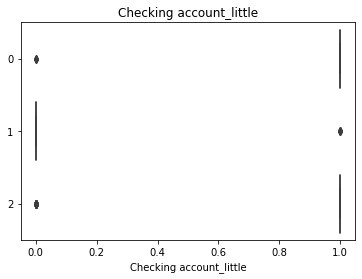

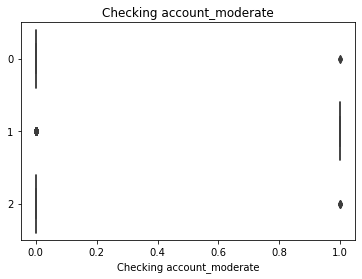

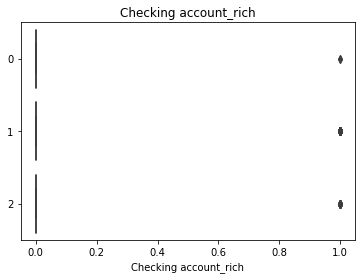

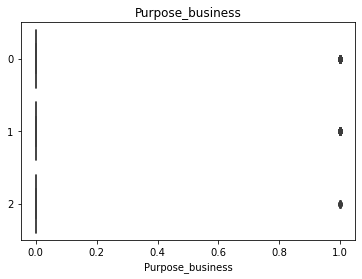

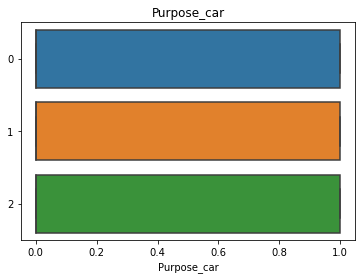

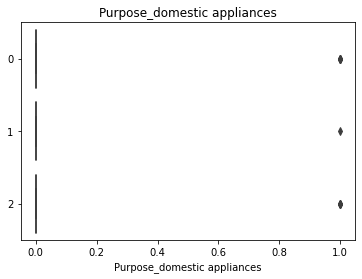

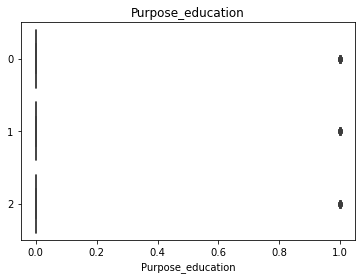

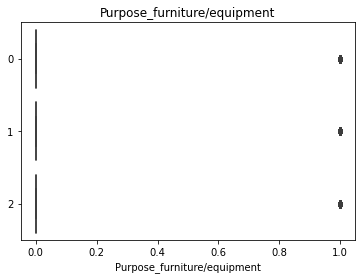

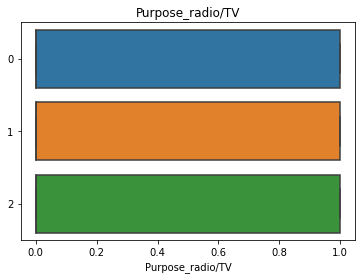

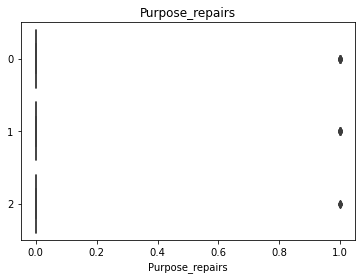

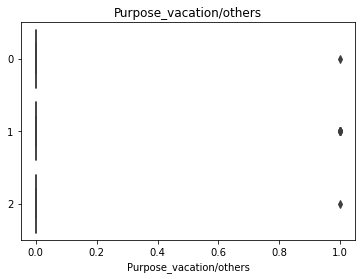

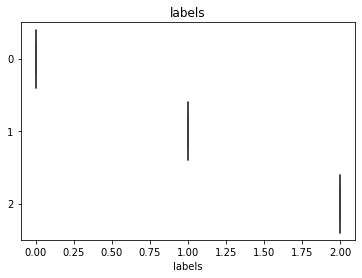

In [579]:
for col in df1.columns:
    sns.boxplot(data=df1, x=col, y=labels, orient='h')
    plt.title(col)
    plt.show();

In [580]:
df1.groupby('labels').median().T.round(2)

labels,0,1,2
Age,36.0,32.0,29.0
Job,2.0,2.0,2.0
Credit amount,2462.5,2511.5,1826.0
Duration,18.0,18.0,16.5
Sex_female,0.0,0.0,1.0
Sex_male,1.0,1.0,0.0
Housing_free,0.0,0.0,0.0
Housing_own,1.0,1.0,1.0
Housing_rent,0.0,0.0,0.0
Saving accounts_little,1.0,1.0,1.0


## DBSCAN

In [581]:
dbscan = DBSCAN().fit(X_scaled)
labels = dbscan.labels_

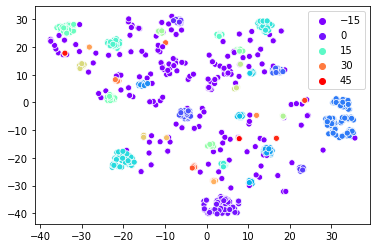

In [582]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels, palette='rainbow');

In [583]:
# Алгоритм "из коробки" не сработал.
# Он чувствителен к настройкам. Попробую что-нибудь сделать

In [584]:
def dbscan_clustering(eps_range, X_scaled):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(X_scaled)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(X_scaled, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)
        
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

100%|██████████████████████████████████████████| 20/20 [00:02<00:00,  7.38it/s]


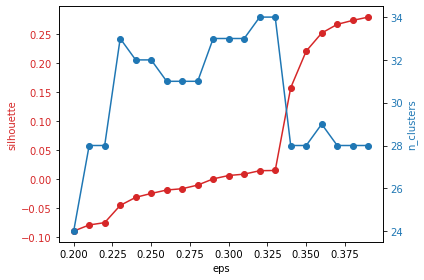

In [585]:
eps_range = np.arange(0.2,0.4,0.01)
dbscan_clustering(eps_range, X_scaled)

In [586]:
# Данные распределены неплотно,поэтому DBSCAN определяет их как разные кластеры.
# Он не подходит для этого фрейма

## Выводы

### K-means

In [587]:
# Кластер 0 - средний возраст, средний кред.счёт, мужчины
# Кластер 1 - старший возраст, выше сумма кредита, мужчины
# Кластер 2 - меньший возраст, меньше сумма кредита, женщины

# Все домовладельцы, у все небольшой сбер. счёт, одинакоый срок кредита,2 работы

### AgglomerativeClustering

In [587]:
# Кластер 0 - старший возраст, средний кред.счёт, мужчины,18 мес.срок кредита
# Кластер 1 - средний возраст, выше сумма кредита, мужчины,18 мес.срок кредита
# Кластер 2 - меньший возраст, меньше сумма кредита, женщины,16.5 мес.срок кредита

# Все домовладельцы, у всех небольшой сбер.счёт,2 работы 